# DSGA 1018 - Lab 4

Please submit the code and a pdf of the output.

Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".

### Due: 10/03/2022 11:59 pm (next Monday). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot

## Apply AR Model

In this example, we will fit an AR(p) model to the SunActivity data, which denotes the number of sunspots for each year.

We will determine p, fit the model, compute the roots and the lag 0 to p components of the ACF.

Wikipedia for sunspots: https://en.wikipedia.org/wiki/Sunspot

The code in this section is selected from the tutorial specified in the reference section.

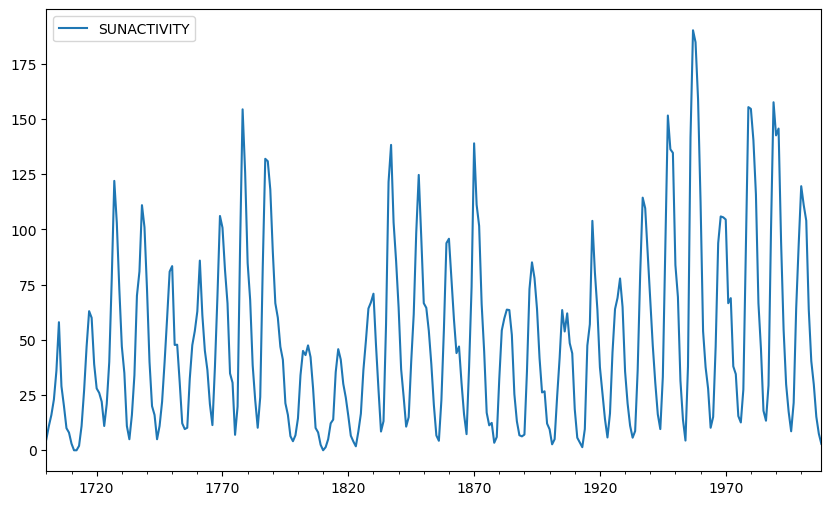

In [2]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(10,6))
plt.show()

#### ACF & PACF

/opt/miniconda3/envs/PTSA/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


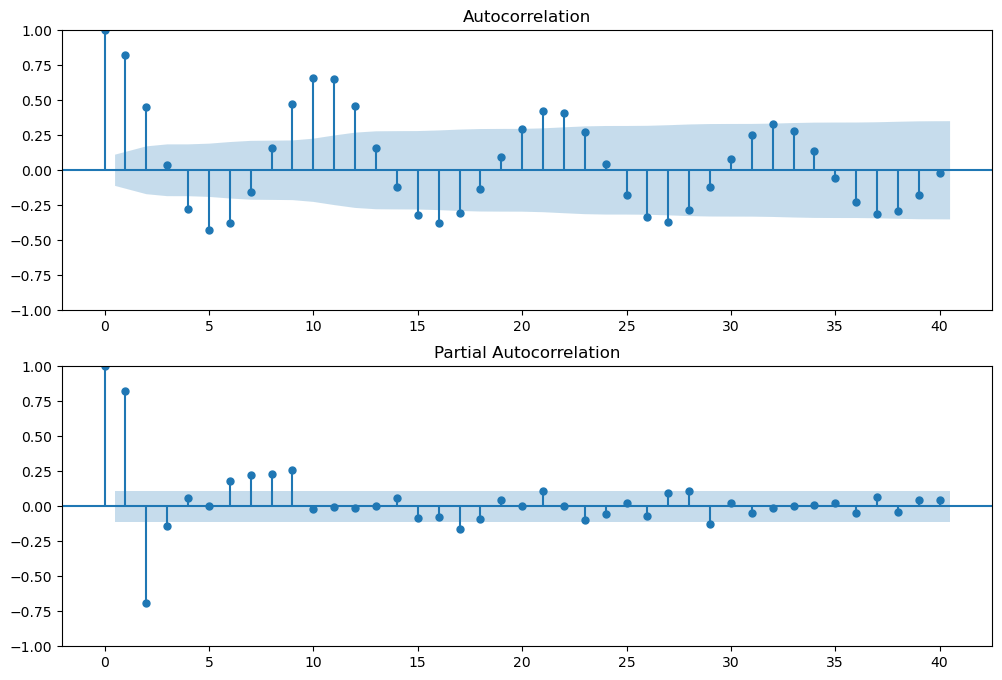

In [3]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

#### Fit AR Model of order p

In [4]:
# TODO: chose p appropriately
p = 

arma_mod = sm.tsa.ARIMA(dta, order=(p,0,0)).fit()
print(arma_mod.params)

# TODO: predict ACF of model at lag 0, 1, ..., p
# Hint: use arma_mod.params[n] to access the nth parameter of the AR model
rho = np.zeros(p+1)
    
# TODO: compute roots
roots = np.zeros(2)

print('roots: ', roots)

/opt/miniconda3/envs/PTSA/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/PTSA/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/PTSA/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64
roots:  [1.00979348+0.65772044j 1.00979348-0.65772044j]


#### prediction

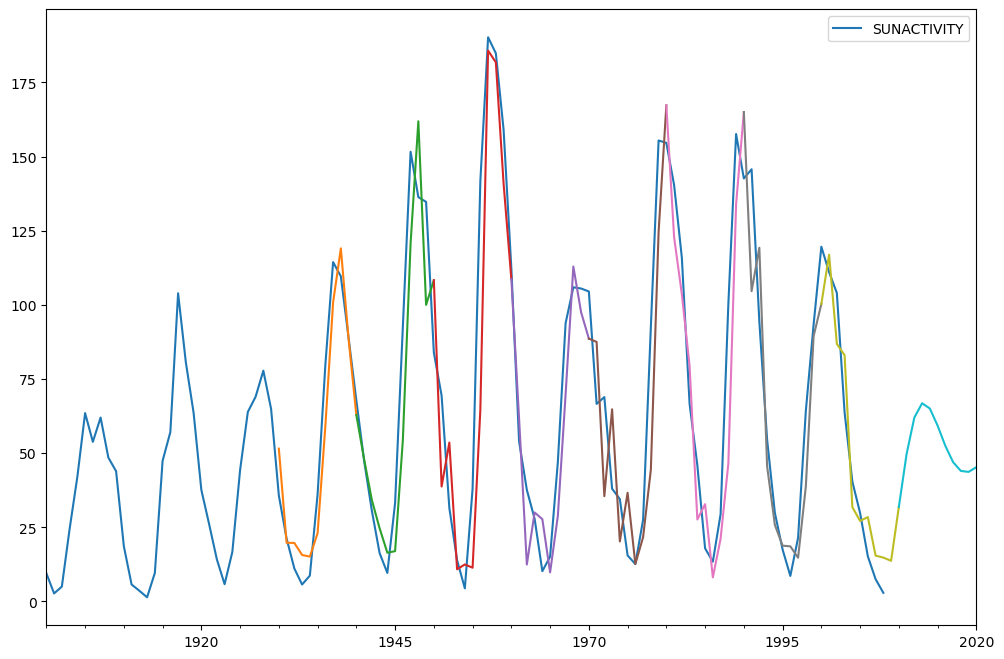

In [5]:
# TODO: try to predict further into the future by increasing tsteps
tsteps=

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['1900':].plot(ax=ax)
T = np.arange(1930, 2030, tsteps)
for tt in range(len(T)-1):
    pred = arma_mod.predict(str(T[tt]), str(T[tt+1]), ax=ax, plot_insample=False)
    pred.plot(ax=ax)
plt.show()

#### plot ACF and PACF

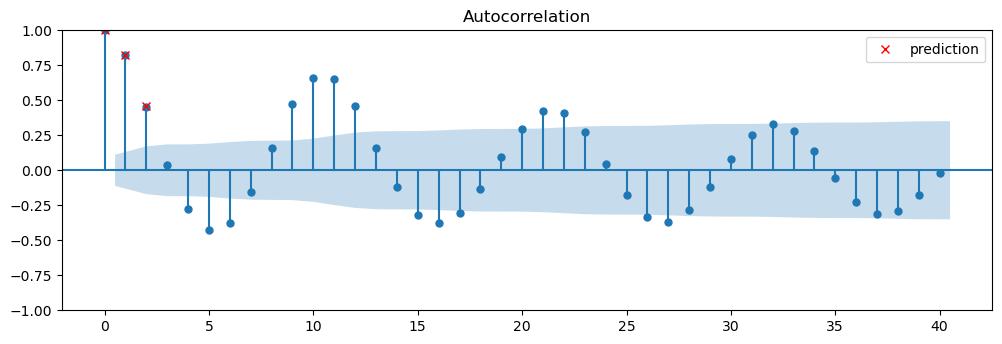

In [7]:
predict_sunspots = arma_mod.predict('1950', '2012', dynamic=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.plot(np.arange(p+1), rho, 'xr', label='prediction')
ax1.legend()
plt.show()

## Implement AR model from Scratch

### Section I: Implementing the AR Model

Recall that the negative log-likelihood function takes as input the parameter values and returns the negative log probability
of the observed data, under the assumption that those were the parameters used to generate the data.

For an AR(p) model, we have:

$$ NLL(\phi_1, \phi_2, \ldots, \phi_p, \sigma ~; x_1, x_2, \ldots, x_n) = \sum_{t=p+1}^n \left( \log \left( \sigma \sqrt{2 \pi} \right) + \frac{1}{2} \cdot \left( \frac{x_t - \left( \sum\limits_{i=1}^p \phi_i x_{t-i} \right)}{\sigma} \right)^2 \right) $$

Optional: We use Nelder-Mead Algorithm to find the minimum of the loss. Check this link if you're interested (https://machinelearningmastery.com/how-to-use-nelder-mead-optimization-in-python/)

In [8]:
class ARModel:
    """Class that implements an ARMA Model. Its functions are as follows:
    1. Maximum Likelihood estimation of parameters
    2. Inference/prediction of future states
    3. Data simulation
    """
    def __init__(self, p, data, p_params = None, sigma = None):
        """Initialize the network state
        @param p: the number of time steps to include in the AR process
        @param p_params: the initialization for the AR parameters
        """
        if (p_params is None):
            p_params = np.zeros(p)
        if (sigma is None):
            sigma = 1
            
        assert p == len(p_params)
        
        #assign parameter values
        self.p = p
        self.p_params = p_params
        self.sigma = sigma
        #store the data within the object
        self.data = data
    
    def loss(self, params):
        """
        params: array of parameters, elements 0:p = p_params, element p = sigma
        returns: loss
        """
        assert len(params) == self.p + 1
        N = self.data.shape[0]
        p_params = params[0:self.p]
        sigma = params[self.p]
        loss = 0
        
        # TODO: calculate the NLL of the data for the purposes of optimization and store it in loss

        return loss

    def fit(self):
        # Minimize the loss function, given the dataset
        params = np.concatenate((self.p_params, np.array([self.sigma])))
        res = minimize(self.loss, params, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
        self.p_params = res.x[0:self.p]
        self.sigma = res.x[self.p]
        
    def predict(self,data, N):
        """Method that predicts N timesteps in the future given input data
        @params data: p data points used to form the prediction
        @params N: number of time steps to predict in the future
        
        returns:
        prediction: predicted future values
        conf: variances of the forecast errors (predicted - true)
        """
        assert len(data) == self.p
        prediction = np.zeros(N)
        conf = np.zeros(N)
        
        #TODO: predict N time steps in advance, given an input. 
        #The inference can be specific to your choice of p, no need to worry about general inference here

        return prediction.ravel(), conf.ravel()
        
    def simulate(self,N):
        """Method that stimulates data given the p_params and q_params
        @param N: number of datapoints to simulate
        returns: N sampled datapoints
        """
        transient = 100 # length of time to run the simulation to wash out initial conditions
        w_t = self.sigma * np.random.normal(size = (N + transient,))
        x_t = np.zeros(N + transient)
        
        # TODO: generate data x_t given the parameters and white noise w_t

        return x_t[transient::] #discard the transient when returning simulated data    

### Section II: Fitting the AR Model

In this section, we will load some data from an unknown source, look at its ACF and PACF
plots to determine an appropriate AR(p) order, and fit the AR(p) model to the data to determine
the coefficients of the AR model as well as the standard deviation of the driving white noise process.

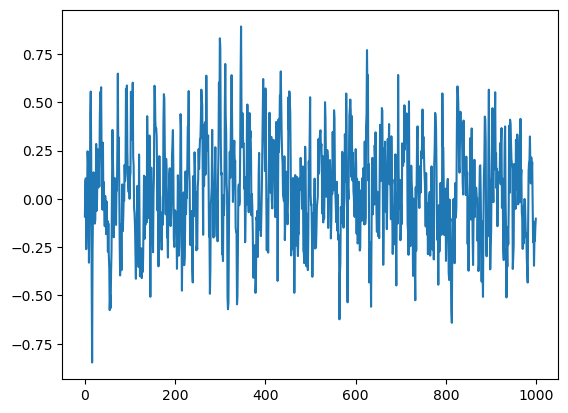

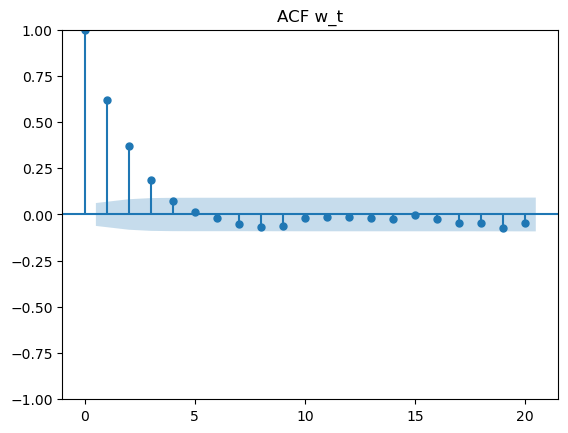

/opt/miniconda3/envs/PTSA/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

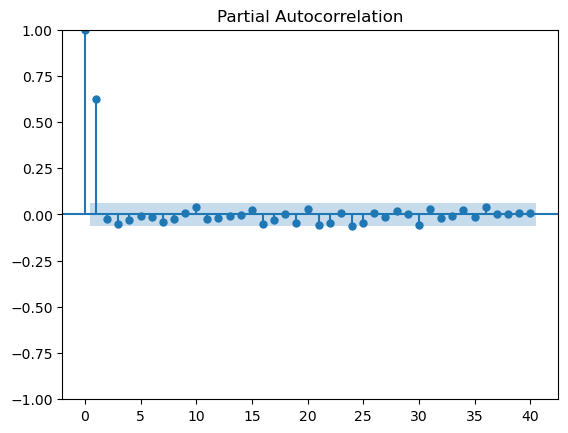

In [9]:
data = np.load("lab_4_data.npy")

#plot the acf of the data
lag = 20
plt.plot(data)
plot_acf(x=data, lags=lag, title="ACF w_t")
plt.show()

#plot the pacf of the data
plt.figure()
sm.graphics.tsa.plot_pacf(data, lags=40)
plt.show()

In [10]:
# fit the model
p =  #TODO: choose a 'p' value

# TODO : set p_params and sigma to an educated guess for parameter values
data_fitter = ARModel(p, data, p_params = np.array([]), sigma = 0.5) 
data_fitter.fit()
print('lambda = ' + str(data_fitter.p_params))
print('sigma = ' + str(data_fitter.sigma))

Optimization terminated successfully.
         Current function value: -1092.023288
         Iterations: 72
         Function evaluations: 140
lambda = [0.63175827]
sigma = 0.2032910898022268


### Section III: Simulating data

Now, we will use our fitted model to simulate a run of the AR model.

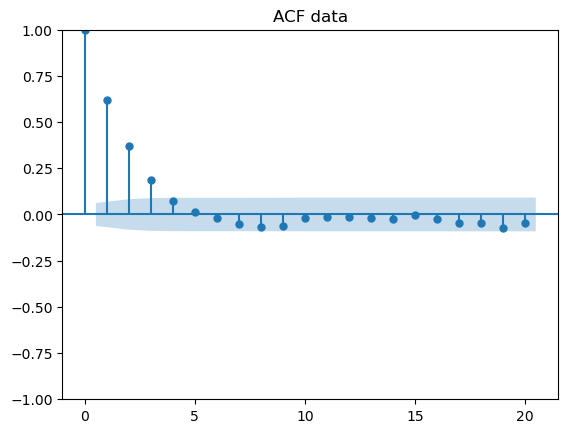

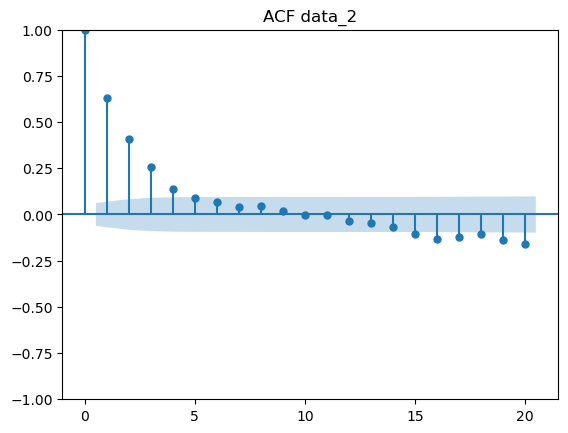

<Figure size 640x480 with 0 Axes>

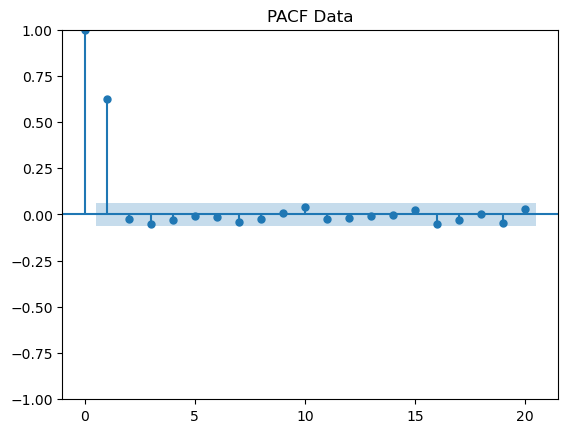

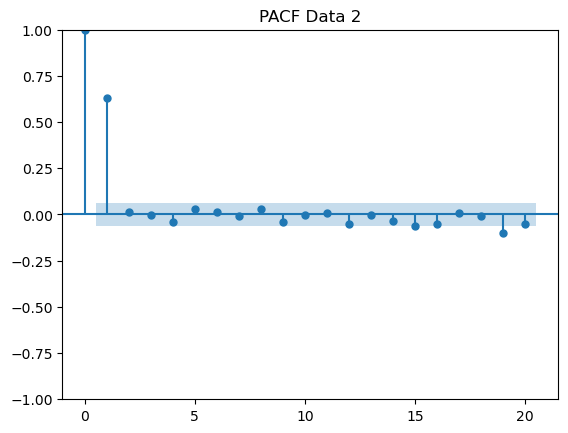

In [11]:
#Generate 1000 samples from the fit model
data_2 = data_fitter.simulate(1000)

#Compare the ACF from the fit model to the data ACF
lag = 20

plot_acf(x=data, lags=lag, title="ACF data")
plot_acf(x=data_2, lags=lag, title="ACF data_2")
plt.show()

#Compare the PACF from the fit model to the data ACF
plt.figure()
sm.graphics.tsa.plot_pacf(data, lags=20)
plt.title('PACF Data')
sm.graphics.tsa.plot_pacf(data_2, lags=20)
plt.title('PACF Data 2')
plt.show()

### Section IV: Using the AR Model for prediction

Finally, we will use some of the provided data as a starting point and predict the next 20 values
based on our AR model's fitted parameters. This will be repeated for each of various starting points.

In [12]:
#for each of the given data points, generate predictions 20 time steps into the future

data_prediction = data[0:100:25]
predictions = np.zeros((len(data_prediction), 20))
mse = np.zeros((len(data_prediction), 20))
for ii in range(0, len(data_prediction)):
    #for each data point, predict for each of 20 time steps
    predictions[ii,:], mse[ii,:] = data_fitter.predict(data_prediction[[ii]],20)

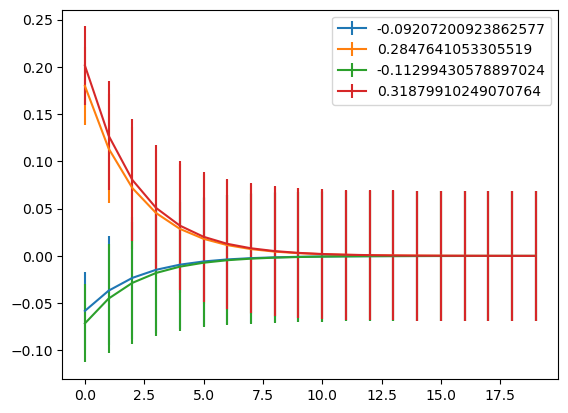

In [13]:
#plot the MSE bars of the estimate
plt.figure()
for ii in range(0, len(data_prediction)):
    plt.errorbar(np.arange(0,20), predictions[ii,:], yerr = mse[ii,:])
plt.legend(data_prediction)
plt.show()